<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [51]:
movies = pd.read_csv('./datasets/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [53]:
movies.shape

(979, 6)

There are 979 rows and 6 columns 

#### Check the data type of each column.

In [54]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [55]:
movies.duration.mean()


120.97957099080695

Average movie duration is around 120 mins

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [56]:
movies.duration.value_counts().sort_index()

64      1
66      1
67      1
68      2
69      1
70      1
75      2
76      1
78      3
79      1
80      6
81      5
82      2
83      5
84      3
85      9
86      4
87      5
88     11
89      8
90      7
91      7
92     13
93     14
94     14
95      7
96     16
97     10
98     18
99     15
       ..
175     3
177     1
178     4
179     2
180     1
181     3
182     1
183     1
184     1
186     1
187     1
188     2
189     3
191     2
193     1
194     1
195     1
197     2
200     1
201     1
202     1
205     1
207     1
212     1
216     1
220     1
224     1
229     1
238     1
242     1
Name: duration, Length: 133, dtype: int64

The shortest movie is 64 mins and the longest movie is 242 mins

#### Create a histogram of duration, choosing an "appropriate" number of bins.

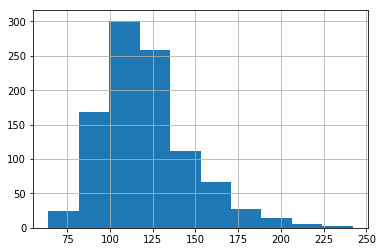

In [57]:
movies.duration.hist(bins = 10);

#### Use a box plot to display that same data.

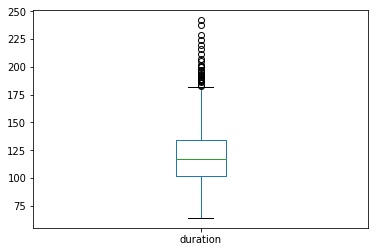

In [58]:
movies.duration.plot(kind='box');

we get the same result, most data are concentrated between 100 mins to 125 mins.

## Intermediate level

#### Count how many movies have each of the content ratings.

In [59]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

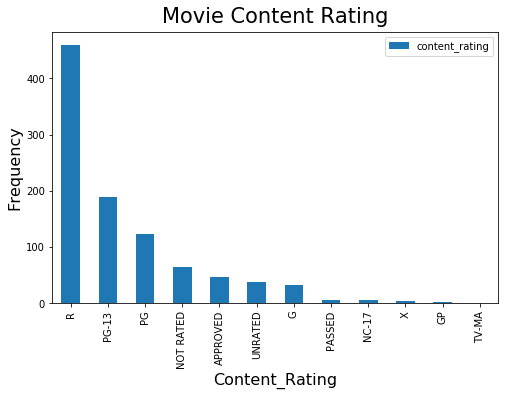

In [60]:
#plot the content_rating with bar chart
df = movies.content_rating.value_counts().plot(kind='bar', stacked=True, figsize=(8,5));

# Set the title.
df.set_title('Movie Content Rating', fontsize=21, y=1.01);

# Move the legend.
df.legend(loc=1);

# x-axis labels
df.set_ylabel('Frequency', fontsize=16);

# y-axis labels
df.set_xlabel('Content_Rating', fontsize=16);


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [61]:
# replace all instances of a value in content_rating column

movies.content_rating.replace('NOT RATED', 'UNRATED', inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED', inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED', inplace=True)
movies.content_rating.replace('GP', 'UNRATED', inplace=True)

In [62]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

we can see that 'NOT RATED', 'APPROVED', 'PASSED', 'GP' are all been replaced by 'UNRATED'.

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [63]:
movies.content_rating.replace('X', 'NC-17', inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17', inplace=True)

In [64]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

we can see that TV-MA and X are merged to NC-17.

#### Count the number of missing values in each column.

In [65]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

 True if missing, False if not missing, and True = 1 and False = 0, because content_rating = 3 so we know content_rating column has 3 missing values.

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [66]:
movies[movies.content_rating.isnull()]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


By examing the rest of the dataset, we will replace the missing value by 'PG-13'.

In [67]:
movies.content_rating.fillna(value='PG-13', inplace=True)

In [68]:
#double check if all missing values have been removed.
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [69]:
movies.star_rating[movies.duration < 120].mean()

7.838666666666657

In [70]:
movies.star_rating[movies.duration >= 120].mean()

7.948898678414082

We have this filter for movie more than 2 hours, and we get the average star rating for those movies are 7.83, and for those movies less than 2 hours, the average star rating are 7.94.

#### Use a visualization to detect whether there is a relationship between duration and star rating.

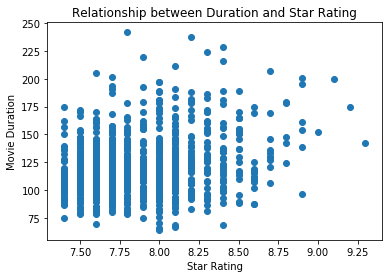

In [71]:
import matplotlib.pyplot as plt

plt.scatter(movies.star_rating,movies.duration)

plt.title('Relationship between Duration and Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Movie Duration')
plt.show()

From the scatter plot we see that, for each star rating, some movies are longer and some movies are shorter. We can concluded that, there's no strong evidence suggests that if the movie has longer duration, the star rating will be higher.

#### Calculate the average duration for each genre.

In [72]:
 movies.duration.groupby([movies.genre]).mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

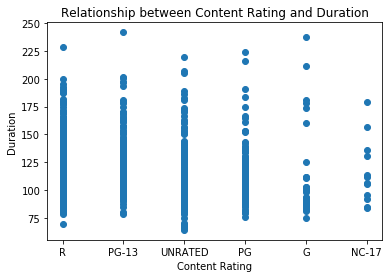

In [74]:
plt.scatter(movies.content_rating,movies.duration)

plt.title('Relationship between Content Rating and Duration')
plt.xlabel('Content Rating')
plt.ylabel('Duration')
plt.show()

There's no strong correlation between content rating and duration, they seem independent from each other.

#### Determine the top rated movie (by star rating) for each genre.

First, we can sort the dataset by star_rating.

In [77]:
movies.sort_values(['genre','star_rating'],ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
26,8.6,Once Upon a Time in the West,PG-13,Western,175,"[u'Henry Fonda', u'Charles Bronson', u'Claudia..."
59,8.5,Django Unchained,R,Western,165,"[u'Jamie Foxx', u'Christoph Waltz', u'Leonardo..."
107,8.3,For a Few Dollars More,UNRATED,Western,132,"[u'Clint Eastwood', u'Lee Van Cleef', u'Gian M..."
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
236,8.1,High Noon,PG,Western,85,"[u'Gary Cooper', u'Grace Kelly', u'Thomas Mitc..."
263,8.1,Rio Bravo,UNRATED,Western,141,"[u'John Wayne', u'Dean Martin', u'Ricky Nelson']"
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."
704,7.6,High Plains Drifter,R,Western,105,"[u'Clint Eastwood', u'Verna Bloom', u'Marianna..."
350,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."


We need to pick the top movie for each genre, so we need a group by and a head function with index.

In [78]:
movies.sort_values(['genre','star_rating'],ascending=False).groupby('genre').head(1).reset_index(drop=True)


,star_rating,title,content_rating,genre,duration,actors_list
0,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
1,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."
2,8.2,Blade Runner,R,Sci-Fi,117,"[u'Harrison Ford', u'Rutger Hauer', u'Sean You..."
3,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
4,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
5,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
6,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."
7,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
8,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
9,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

we can simply use value_counts to see if there're multiple movies with the same title, and we see a few of them, the same title has showed up more then once.

In [79]:
movies[movies.duplicated(['title'], keep=False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


We can see that even the movies have the same title, but the actors list are different, so we know that they are actually different movies.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [80]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

Our list will only show from Drama to Mystery, because other genres has less than 10 movies.

First, we need to re-select our dataset, it should only include the genres we wanted, which have movies 10 or more.

In [81]:
v= movies.genre.value_counts()
movies[movies.genre.isin(v.index[v.gt(10)])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


If we run our code before our data selection, we get star_rating for all genres.

In [82]:
movies.star_rating.groupby([movies.genre]).mean(numeric_only=None)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

Then, we can run our code for our new dataset(re-selected).

In [83]:
v= movies.genre.value_counts()
movies[movies.genre.isin(v.index[v.gt(10)])].star_rating.groupby([movies.genre]).mean(numeric_only=None)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!